###  LDA
### Linear discriminant analysis



In [3]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd


In [4]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
from sklearn.model_selection import train_test_split

X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



X_train:  (120, 4) y_train: (120,)


In [8]:
print("X_train: ", X_train.shape, "y_train:", y_train.shape)
print("X_test: ", X_test.shape, "y_test:", y_test.shape)

X_train:  (120, 4) y_train: (120,)
X_test:  (30, 4) y_test: (30,)


In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import accuracy_score, confusion_matrix




In [25]:


lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train, y_train)


LinearDiscriminantAnalysis(n_components=2)

In [26]:
y_predict = lda.predict(X_test)

In [27]:
## with one linear discriminant, the algorithm achieved an accuracy of 100%,
print("accuracy:", accuracy_score( y_test, y_predict) )


accuracy: 1.0


In [28]:
print("Confusion Maxtrix: \n" ,    confusion_matrix ( y_test, y_predict) ) 

Confusion Maxtrix: 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [29]:
# prediction on unseen data
X_unseen = [[4.95, 3.1, 1.4, 0.3]] 
pred = lda.predict(X_unseen)
pred

array([0])

In [30]:
target_name_array = np.array(iris.target_names)
print( target_name_array[pred])

['setosa']


## LDA for dimension reduction

In [34]:
import matplotlib.pyplot as plt



In [35]:

transform = lda.transform(X)
print(X.shape, transform.shape)

(150, 4) (150, 2)


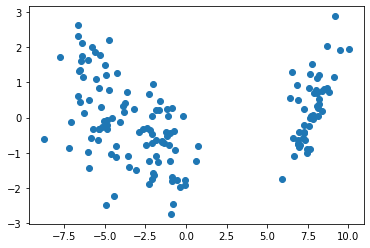

In [36]:
plt.scatter(transform[:, 0], transform[:, 1])

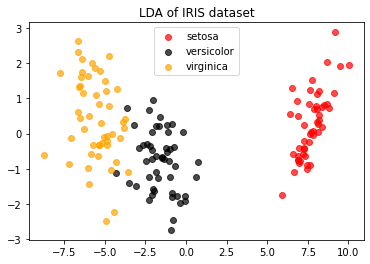

In [38]:
colors = ['red', 'black', 'orange']

plt.figure()
for i in [0, 1, 2]:
    plt.scatter(transform[y == i, 0]
               ,transform[y == i, 1]
               ,alpha=.7
               ,c=colors[i]
               ,label=iris.target_names[i]
               )
plt.legend()
plt.title('LDA of IRIS dataset')
plt.show()

In [39]:
##  test on Transformed data ( dimention =2 )

In [40]:
X_train, X_test, y_train, y_test = train_test_split(transform, y, test_size=0.2, random_state=0)

In [41]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=2)

In [42]:
y_predict = lda.predict(X_test)

In [43]:
print("accuracy:", accuracy_score( y_test, y_predict) )

accuracy: 1.0


In [44]:
print("Confusion Maxtrix: \n" ,    confusion_matrix ( y_test, y_predict) ) 

Confusion Maxtrix: 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


#  PCA vs LDA: What's the Difference?: What to Choose for Dimensionality Reduction?


In [ ]:
## In case of uniformly distributed data, LDA almost always performs better than PCA. 
## However if the data is highly skewed (irregularly distributed) then it is advised to use PCA since LDA can be biased towards the majority class.

In [45]:

## Both PCA and LDA are linear transformation techniques. 
## PCA is an unsupervised while LDA is a supervised dimensionality reduction technique.

In [46]:
##  PCA tries to find the directions of the maximum variance in the dataset
## LDA tries to find a seperation boundary around each cluster of a class.